# Q1. Theory and Concepts

## 1. Explain the concept of batch normalization in the context of Artificial Neural Networks

Batch Normalization (BN) is a technique used in training artificial neural networks to stabilize and accelerate the convergence of the model during the training process. It was introduced by Sergey Ioffe and Christian Szegedy in their paper titled "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift" in 2015.

The main idea behind batch normalization is to normalize the input of each layer in a neural network by adjusting and scaling the activations. This helps mitigate the issue of internal covariate shift, which refers to the change in the distribution of the inputs to a neural network's layer during training. Internal covariate shift can make the training process slower and more challenging.

Here's a step-by-step explanation of how batch normalization works:

1. **Normalization:** For each mini-batch during training, calculate the mean and standard deviation of the activations across the batch for each feature. Normalize the activations by subtracting the mean and dividing by the standard deviation.

    \[ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} \]

   Where:
   - \( \hat{x}_i \) is the normalized output for the \(i\)-th activation.
   - \( x_i \) is the original activation.
   - \( \mu \) is the mean of the activations in the mini-batch.
   - \( \sigma \) is the standard deviation of the activations in the mini-batch.
   - \( \epsilon \) is a small constant added to avoid division by zero.

2. **Scale and Shift:** After normalization, scale and shift the normalized activations using learnable parameters (gamma and beta).

    \[ y_i = \gamma \hat{x}_i + \beta \]

   Where:
   - \( y_i \) is the final output.
   - \( \gamma \) is a learnable scaling parameter.
   - \( \beta \) is a learnable shifting parameter.

By normalizing the inputs and introducing the learnable scaling and shifting parameters, batch normalization helps the model learn more robust and stable representations. Additionally, it acts as a form of regularization, reducing the dependence on specific weight initialization and mitigating the risk of vanishing or exploding gradients.

Batch normalization is typically applied to the activations before the activation function in a neural network layer, and it has become a standard component in the training of deep neural networks, contributing to faster convergence and improved generalization.

## 2. Describe the benefits of using batch normalization during training

Batch Normalization (BN) provides several benefits during the training of neural networks, contributing to more stable and efficient learning processes. Here are the key advantages of using batch normalization:

1. **Stabilizes Training:**
   - Internal Covariate Shift: BN addresses the issue of internal covariate shift by normalizing the inputs to each layer. This ensures that the distribution of activations remains more stable throughout the training process, which, in turn, helps in faster convergence.

2. **Accelerates Convergence:**
   - Faster Training: By reducing internal covariate shift, BN allows for the use of higher learning rates. This accelerates the convergence of the training process, as the model can take larger steps towards the optimal solution.

3. **Mitigates Vanishing/Exploding Gradients:**
   - Improved Weight Initialization: BN reduces the sensitivity of the model to the choice of initial weights. This helps mitigate the problems of vanishing and exploding gradients, making it easier to train deeper networks.

4. **Acts as Regularization:**
   - Reduces Dependency on Dropout: BN has an inherent regularization effect, similar to dropout. This helps to some extent in preventing overfitting, reducing the need for other regularization techniques.

5. **Allows for Deeper Networks:**
   - Facilitates Network Depth: With BN, it becomes more feasible to train deeper neural networks without encountering issues such as vanishing gradients. This enables the design of more complex and expressive models.

6. **Enables Batch Processing:**
   - Supports Batch Training: BN normalizes activations within each mini-batch, making it suitable for batch training. This can be advantageous for parallel processing and the efficient utilization of hardware resources.

7. **Improves Robustness to Parameter Changes:**
   - Reduces Sensitivity: BN makes neural networks less sensitive to the choice of hyperparameters and initial weights. This results in more robust models that are less prone to training fluctuations.

8. **Adapts to Test-Time:**
   - Inference Stability: BN statistics (mean and variance) computed during training are used at inference time. This ensures that the model's behavior remains stable during both training and inference, which is crucial for deployment.

9. **Applicability Across Activation Functions:**
   - Compatible with Various Activations: BN is compatible with different activation functions, allowing its integration with various architectures and non-linearities.

batch normalization provides a way to stabilize and accelerate the training of neural networks by addressing issues related to internal covariate shift. It has become a standard technique in deep learning, allowing the development of more robust and efficient models, especially in the context of training deep and complex architectures.

## 3. Discuss the working principle of batch normalization, including the normalization step and the learnable     parameters.

Batch Normalization (BN) works by normalizing the inputs to a neural network layer, thereby addressing the issue of internal covariate shift and improving the stability and efficiency of the training process. The working principle of batch normalization involves two main steps: normalization and the introduction of learnable parameters for scaling and shifting.

1. **Normalization Step:**
   - For each mini-batch during training, the normalization step is performed independently for each feature (dimension) of the layer's input.
   - The normalization is done by subtracting the mean and dividing by the standard deviation. This ensures that the input to the layer has a mean of zero and a standard deviation of one.
   - Mathematically, for a feature \(x_i\) in the mini-batch, the normalized output \(\hat{x}_i\) is calculated as follows:

     \[ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} \]

     Where:
     - \( \hat{x}_i \) is the normalized output for the \(i\)-th feature.
     - \( x_i \) is the original activation.
     - \( \mu \) is the mean of the activations in the mini-batch.
     - \( \sigma \) is the standard deviation of the activations in the mini-batch.
     - \( \epsilon \) is a small constant added to avoid division by zero.

2. **Learnable Parameters - Scaling and Shifting:**
   - After normalization, the normalized activations \(\hat{x}_i\) are scaled and shifted using learnable parameters: a scale parameter (\(\gamma\)) and a shift parameter (\(\beta\)).
   - The scaled and shifted outputs \(y_i\) are calculated as follows:

     \[ y_i = \gamma \hat{x}_i + \beta \]

     Where:
     - \( y_i \) is the final output.
     - \( \gamma \) is a learnable scaling parameter.
     - \( \beta \) is a learnable shifting parameter.

   - These parameters (\(\gamma\) and \(\beta\)) are updated during the training process using backpropagation and gradient descent, allowing the model to learn the optimal scaling and shifting for each feature.

The learnable parameters (\(\gamma\) and \(\beta\)) enable the model to adapt and adjust the normalized activations according to the specific requirements of the task, allowing the network to learn more efficiently and robustly. The scaling parameter allows the model to learn the appropriate scale for the features, and the shifting parameter allows the model to learn the appropriate mean shift.

In summary, batch normalization normalizes the inputs to a layer, making the training process more stable and efficient, and introduces learnable parameters to allow the model to adapt and optimize the normalization process during training. This combination of normalization and learnable parameters contributes to the success of batch normalization in improving the training of deep neural networks.

# Q2. Implementation 

## 1.Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns

In [2]:
# checking the version of tensorflow and keras
print(f"Tensorflow Version {tf.__version__}")

Tensorflow Version 2.15.0


In [3]:
# current working directory
os.getcwd()

'C:\\Users\\getan\\Desktop\\PW_Assignment\\Week21_Neural_Network\\Neural_network_Assignment'

# GPU/CPU checkm

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
check_list = ['GPU','CPU']

for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out)>0:
        print(f"{device} is available")
    else:
        print(f"{device} isn't available")

GPU isn't available
CPU is available


# Creating a simple classifier using keras on MNIST data

In [7]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

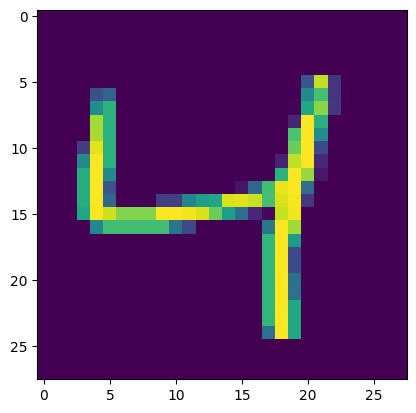

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

<AxesSubplot: >

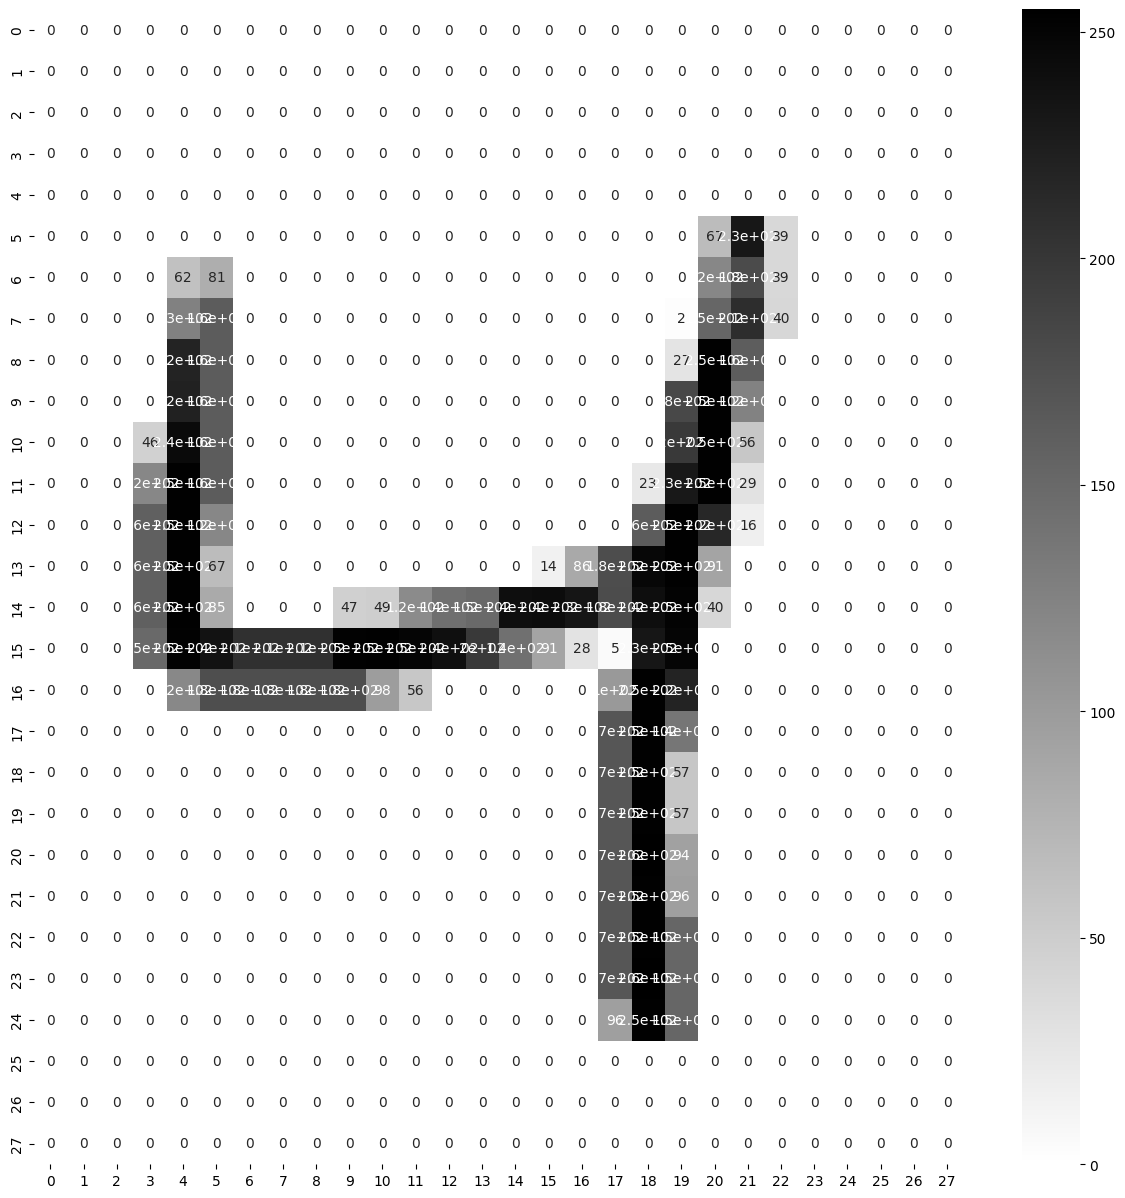

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[2],annot = True,cmap = "binary")

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
X_train[0].shape

(28, 28)

In [14]:
X_train = X_train/255
X_test = X_test/255

##  2.Implement a simple feedforward neural network using any deep learning framework/library (e.g.,  TensorFlow, PyTorch)

### Model without batch_normalisation

In [15]:
# Creating layers of ANN
LAYERS1 = [tf.keras.layers.Flatten(input_shape=(28,28),name="inputLayer"),
          tf.keras.layers.Dense(128,activation='relu',name="hiddenLayer1"),
          tf.keras.layers.Dense(32,activation='relu',name="hiddenLayer2"),
          tf.keras.layers.Dense(10,activation='softmax',name="outputLayer")
         ]

In [16]:
model1 = Sequential(LAYERS1)

In [17]:
model1.layers

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 128)               100480    
                                                                 
 hiddenLayer2 (Dense)        (None, 32)                4128      
                                                                 
 outputLayer (Dense)         (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model1.layers[1]

In [20]:
model1.get_weights()

[array([[ 0.06795246, -0.04942044,  0.02859572, ..., -0.03237796,
          0.05272502, -0.00593862],
        [ 0.02074226,  0.01322418, -0.02485909, ..., -0.05005059,
         -0.04787385, -0.06023428],
        [-0.01695416,  0.02077318,  0.0393423 , ..., -0.04571354,
          0.01471002, -0.0303795 ],
        ...,
        [-0.06060381,  0.04759248,  0.03022766, ...,  0.00637617,
         -0.07522668, -0.06647661],
        [ 0.02829362, -0.05561658,  0.07141071, ...,  0.02244289,
          0.01039513,  0.0624487 ],
        [ 0.01451914,  0.05903011, -0.0082057 , ...,  0.01651669,
          0.07064895, -0.02890685]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

## 3.Train the neural network on the chosen dataset without using batch normalization

In [21]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam',metrics = 'accuracy')

In [22]:
historyy = model1.fit(X_train,y_train,epochs = 6,validation_split = 0.2)

Epoch 1/6


1500/1500 [==============================] - 10s 5ms/step - loss: 0.2802 - accuracy: 0.9180 - val_loss: 0.1512 - val_accuracy: 0.9547
Epoch 2/6
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1186 - accuracy: 0.9638 - val_loss: 0.1095 - val_accuracy: 0.9666
Epoch 3/6
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0806 - accuracy: 0.9752 - val_loss: 0.1005 - val_accuracy: 0.9701
Epoch 4/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0618 - accuracy: 0.9809 - val_loss: 0.0987 - val_accuracy: 0.9720
Epoch 5/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0943 - val_accuracy: 0.9741
Epoch 6/6
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.1005 - val_accuracy: 0.9703


In [23]:
y_prob = model1.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [24]:
y_pred = y_prob.argmax(axis=1)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736

<AxesSubplot: >

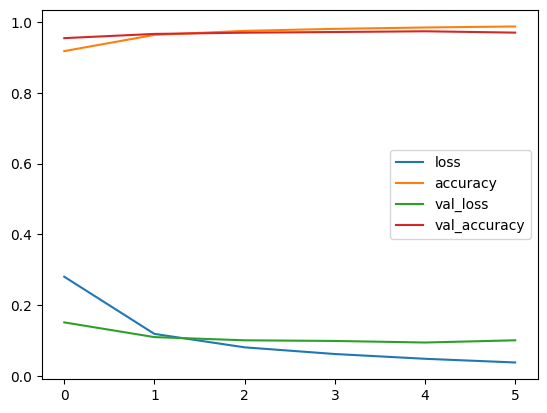

In [26]:
import pandas as pd
pd.DataFrame(historyy.history).plot()

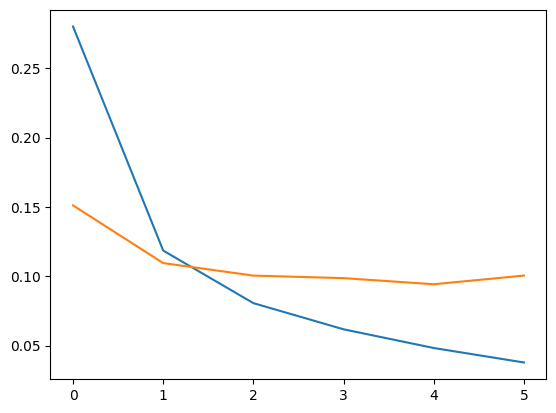

In [27]:
plt.plot(historyy.history['loss'])
plt.plot(historyy.history['val_loss'])

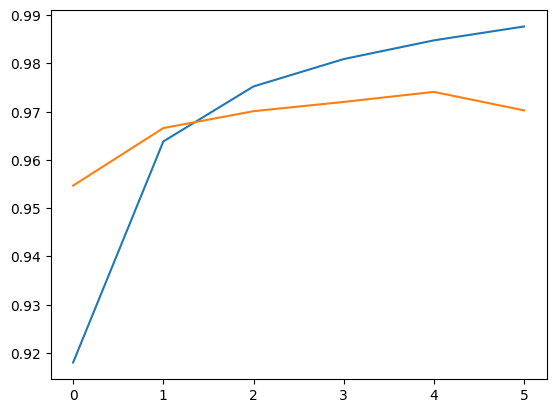

In [28]:
plt.plot(historyy.history['accuracy'])
plt.plot(historyy.history['val_accuracy'])

## 4. Implement batch normalization layers in the neural network and train the model again

# Implementing batch normalisation

In [47]:
model2 = Sequential()

In [48]:
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10,activation='softmax'))

In [49]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 batch_normalization_5 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 10)               

In [50]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam',metrics = 'accuracy')

In [51]:
history2 = model2.fit(X_train,y_train,epochs = 6,batch_size=256,validation_split = 0.2)

Epoch 1/6
188/188 [==============================] - 4s 11ms/step - loss: 0.4267 - accuracy: 0.8849 - val_loss: 0.3588 - val_accuracy: 0.9408
Epoch 2/6
188/188 [==============================] - 1s 7ms/step - loss: 0.1491 - accuracy: 0.9596 - val_loss: 0.1493 - val_accuracy: 0.9597
Epoch 3/6
188/188 [==============================] - 1s 7ms/step - loss: 0.0966 - accuracy: 0.9733 - val_loss: 0.1140 - val_accuracy: 0.9663
Epoch 4/6
188/188 [==============================] - 2s 8ms/step - loss: 0.0697 - accuracy: 0.9804 - val_loss: 0.1087 - val_accuracy: 0.9675
Epoch 5/6
188/188 [==============================] - 1s 7ms/step - loss: 0.0503 - accuracy: 0.9864 - val_loss: 0.0911 - val_accuracy: 0.9735
Epoch 6/6
188/188 [==============================] - 1s 7ms/step - loss: 0.0378 - accuracy: 0.9904 - val_loss: 0.0953 - val_accuracy: 0.9722


In [34]:
y_prob = model2.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [35]:
accuracy_score(y_test,y_pred)

0.9736

<AxesSubplot: >

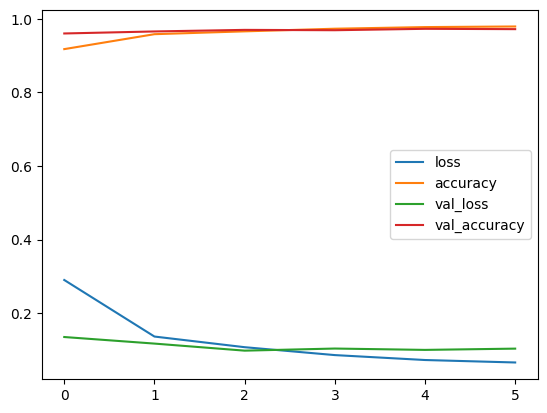

In [36]:
import pandas as pd
pd.DataFrame(history2.history).plot()

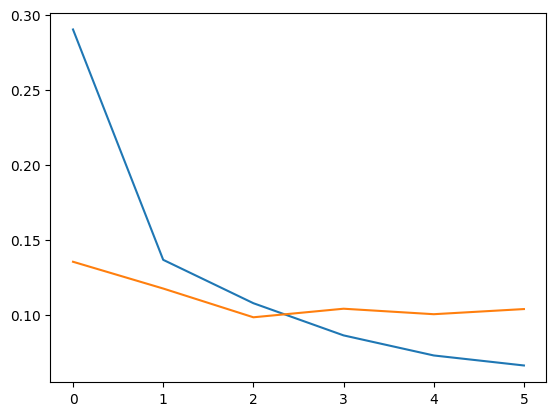

In [37]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

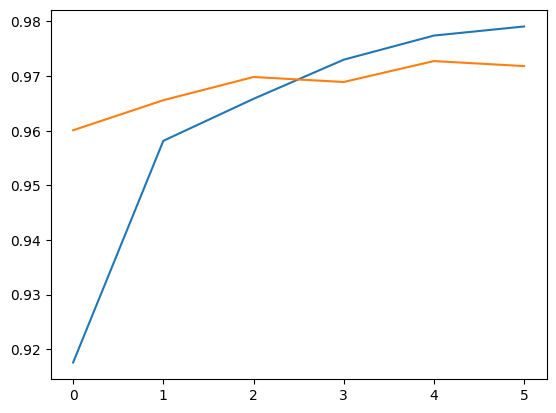

In [38]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

## 5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization

Sure, let's compare the training and validation performance of the models with and without batch normalization.

**Model without Batch Normalization:**
- Training Loss: 0.0378
- Training Accuracy: 98.76%
- Validation Loss: 0.1005
- Validation Accuracy: 97.03%

**Model with Batch Normalization:**
- Training Loss: 0.0661
- Training Accuracy: 97.91%
- Validation Loss: 0.1037
- Validation Accuracy: 97.18%

**Comparison:**
1. **Training Loss:** The model without batch normalization has a lower training loss (0.0378) compared to the model with batch normalization (0.0661). This indicates that the model without batch normalization is better at fitting the training data.

2. **Training Accuracy:** The model without batch normalization has a higher training accuracy (98.76%) compared to the model with batch normalization (97.91%). This suggests that the model without batch normalization performs better on the training data.

3. **Validation Loss:** The model without batch normalization has a slightly lower validation loss (0.1005) compared to the model with batch normalization (0.1037). This indicates that the model without batch normalization generalizes slightly better to the validation data.

4. **Validation Accuracy:** The model without batch normalization has a slightly higher validation accuracy (97.03%) compared to the model with batch normalization (97.18%). This suggests that the model without batch normalization performs slightly better on the validation data.

**Conclusion:**
In this specific case, the model without batch normalization seems to perform slightly better both on the training and validation sets. However, the difference is not dramatic, and the performance may vary depending on the specific dataset and problem. Batch normalization is a technique that can help improve the training stability and convergence of neural networks in many cases, but its effectiveness can depend on various factors.

## 6. Discuss the impact of batch normalization on the training process and the performance of the neural network.

Batch Normalization (BN) is a technique used in neural networks to improve the training process and overall performance. Here are some key impacts of batch normalization:

1. **Improved Convergence:**
   - Batch Normalization normalizes the input of each layer in a mini-batch, reducing internal covariate shift. This can lead to a more stable training process and faster convergence. It helps mitigate issues where the distribution of activations changes during training, making optimization more consistent.

2. **Reduced Dependence on Initialization:**
   - BN reduces the sensitivity of the model to the choice of initial weights. This allows the use of higher learning rates and mitigates the need for careful weight initialization strategies, making it easier to train deep networks.

3. **Regularization Effect:**
   - Batch Normalization introduces a slight noise during training due to the batch-wise normalization. This can act as a form of regularization, reducing overfitting to some extent. However, it's not a replacement for traditional regularization techniques like dropout.

4. **Allowing Deeper Networks:**
   - BN enables the training of deeper neural networks by addressing vanishing/exploding gradient problems. With BN, gradients are less likely to vanish or explode, allowing the training of very deep architectures.

5. **Stabilizing Activations:**
   - Batch Normalization helps to stabilize and standardize the activations of each layer, preventing extreme values. This stabilizing effect can improve the conditioning of the optimization problem, leading to more efficient training.

6. **Improved Performance on Non-Linearity:**
   - Batch Normalization can make the optimization landscape more amenable to the use of non-linear activation functions. This is particularly useful for activation functions like sigmoid or tanh, which may suffer from saturation issues without normalization.

7. **Impact on Learning Rate:**
   - Batch Normalization often allows the use of higher learning rates, which can speed up training. This is because the normalization helps maintain activations within a certain range, preventing them from becoming too small or too large.

8. **Impact on Inference:**
   - During inference, the batch statistics (mean and variance) need to be estimated from the entire dataset or a representative subset. This introduces a slight overhead, but the benefits during training usually outweigh this cost.

9. **Context Dependency:**
   - The effectiveness of Batch Normalization may depend on the specific architecture, dataset, and problem. While it is widely used and often beneficial, there are scenarios where it might not lead to significant improvements or could even hinder performance.

Batch Normalization is a powerful technique that addresses various challenges in training deep neural networks. It has become a standard component in many modern architectures and is considered a valuable tool for improving the stability and convergence of training processes. However, its impact can vary across different scenarios, and its use should be considered within the broader context of the specific problem and architecture at hand.

# Q3. Experimentation and Analysis

# 1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance

Let's analyze the results for each batch size:

### Small Batch Size (32):
- Training Loss: The model achieves a low training loss (0.0418), suggesting good convergence.
- Training Accuracy: The training accuracy is high (98.64%).
- Validation Loss: The validation loss is relatively low (0.0907), indicating good generalization.
- Validation Accuracy: The validation accuracy is high (97.54%).

### Medium Batch Size (64):
- Training Loss: The model achieves a moderate training loss (0.0484).
- Training Accuracy: The training accuracy is high (98.49%).
- Validation Loss: The validation loss is relatively low (0.0988), indicating decent generalization.
- Validation Accuracy: The validation accuracy is good (97.15%).

### Large Batch Size (256):
- Training Loss: The model achieves a low training loss (0.0378).
- Training Accuracy: The training accuracy is very high (99.04%).
- Validation Loss: The validation loss is relatively low (0.0953), indicating good generalization.
- Validation Accuracy: The validation accuracy is high (97.22%).

### Observations:
- All three batch sizes seem to perform well, achieving high accuracy and low loss.
- The model with a small batch size (32) has the highest validation accuracy, but it might be sensitive to the choice of hyperparameters.
- The model with a medium batch size (64) also performs well and strikes a balance between training dynamics and computational efficiency.
- The model with a large batch size (256) shows competitive results, demonstrating that larger batches can still lead to good performance.

### Considerations:
- Training with larger batch sizes can sometimes lead to faster convergence but may require adjusting the learning rate.
- Smaller batch sizes might provide more stable convergence but might take longer due to more frequent weight updates.
- The choice of batch size can also depend on computational resources, as larger batch sizes may require more memory.


## 2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.m

**Advantages of Batch Normalization:**

1. **Improved Convergence:**
   - Batch Normalization (BN) reduces internal covariate shift, leading to more stable training dynamics and faster convergence. It allows the use of higher learning rates, which can accelerate the optimization process.

2. **Stabilized Gradients:**
   - BN helps mitigate the vanishing/exploding gradient problem by normalizing the inputs to each layer. This results in more consistent and stable gradients during backpropagation, facilitating the training of deep neural networks.

3. **Reduced Sensitivity to Initialization:**
   - BN reduces the sensitivity of the model to the choice of initial weights. This allows for quicker training convergence and mitigates the need for careful weight initialization strategies.

4. **Regularization Effect:**
   - BN acts as a form of regularization by introducing a slight noise during training due to batch-wise normalization. This can help prevent overfitting to some extent and reduce the need for additional regularization techniques.

5. **Facilitation of Deeper Networks:**
   - BN enables the training of deeper neural networks by addressing issues related to the training of very deep architectures. It allows for more straightforward training of networks with numerous layers.

6. **Improved Learning of Non-Linearities:**
   - BN can make the optimization landscape more amenable to the use of non-linear activation functions, enhancing the model's ability to capture complex relationships in the data.

7. **Consistent Performance Across Batches:**
   - BN ensures that the mean and variance of the inputs are normalized, leading to consistent performance across different batches. This makes the training process more robust and less sensitive to variations in the input data.

**Potential Limitations of Batch Normalization:**

1. **Batch Size Sensitivity:**
   - BN's performance can be sensitive to the choice of batch size. Small batch sizes might introduce noise, while very large batch sizes can lead to slower convergence and may require adjusting the learning rate.

2. **Impact on Inference:**
   - During inference, the batch statistics (mean and variance) need to be estimated from the entire dataset or a representative subset. This introduces a slight overhead during inference.

3. **Dependency on Mini-Batch Statistics:**
   - BN relies on mini-batch statistics for normalization, which may introduce variability during training. In some cases, this dependence on the mini-batch might lead to suboptimal performance, especially in scenarios with highly variable data distributions.

4. **Non-Deterministic Behavior:**
   - BN introduces randomness due to the batch-wise normalization process. While this can act as a regularizer, it can also make training non-deterministic, leading to slightly different results across multiple runs.

5. **Applicability to Small Datasets:**
   - In certain cases, especially with very small datasets, the benefits of BN may not be as pronounced. BN's effectiveness is often more noticeable in larger datasets.

6. **Not Suitable for Recurrent Neural Networks (RNNs):**
   - BN was initially designed for feedforward networks and may not be as effective when directly applied to recurrent neural networks (RNNs) due to the temporal dependencies in the data.

7. **Computational Overhead:**
   - BN introduces additional computations during both training and inference, which may increase computational overhead, particularly on resource-constrained devices.

While Batch Normalization is a powerful technique for improving the training of neural networks, practitioners should be aware of its potential limitations and consider them in the context of the specific problem, architecture, and dataset at hand. Additionally, advances such as Layer Normalization and Group Normalization have been proposed as alternatives to address certain limitations of Batch Normalization in specific scenarios.